In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, matthews_corrcoef


from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [3]:
phase1_df=pd.read_csv('phase1_raw_slope(5.18).csv',low_memory=False)

In [4]:
cts_light = ['20h_HL', '20h_ML']
phase1_df['y2_slope_select'] = phase1_df.apply(
    lambda row: row['y2_slope'] if row['light_regime'] in cts_light else row['y2_slope_on'],
    axis=1
)

In [5]:
phase1_df

,plate,measurement,start_date,light_regime,dark_threshold,light_threshold,num_frames,i,j,fv_fm,...,elapsed_time_82,elapsed_time_83,elapsed_time_84,y2_slope,y2_intercept,y2_slope_on,y2_intercept_on,y2_slope_off,y2_intercept_off,y2_slope_select
0,18,M5,2024-03-05,10min-10min,20.425804,29.181961,164,0,1,0.576961,...,NaN,NaN,NaN,-0.002506,0.361659,-0.003266,0.183181,-0.001752,0.542707,-0.003266
1,18,M5,2024-03-05,10min-10min,20.425804,29.181961,164,0,2,0.651953,...,NaN,NaN,NaN,-0.002755,0.435669,-0.003686,0.263119,-0.001830,0.611036,-0.003686
2,18,M5,2024-03-05,10min-10min,20.425804,29.181961,164,0,3,0.624463,...,NaN,NaN,NaN,-0.002388,0.395038,-0.002967,0.211910,-0.001815,0.580602,-0.002967
3,18,M5,2024-03-05,10min-10min,20.425804,29.181961,164,0,4,0.572512,...,NaN,NaN,NaN,-0.001649,0.355458,-0.002286,0.178296,-0.001017,0.534316,-0.002286
4,18,M5,2024-03-05,10min-10min,20.425804,29.181961,164,0,5,0.505590,...,NaN,NaN,NaN,-0.001972,0.303104,-0.002241,0.136551,-0.001705,0.471653,-0.002241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44273,22,M2,2024-03-20,20h_HL,15.326361,24.774212,84,15,19,0.686428,...,NaN,NaN,NaN,-0.008297,0.266049,NaN,NaN,NaN,NaN,-0.008297
44274,22,M2,2024-03-20,20h_HL,15.326361,24.774212,84,15,20,0.528924,...,NaN,NaN,NaN,-0.002482,0.150785,NaN,NaN,NaN,NaN,-0.002482
44275,22,M2,2024-03-20,20h_HL,15.326361,24.774212,84,15,21,0.576597,...,NaN,NaN,NaN,-0.003268,0.181589,NaN,NaN,NaN,NaN,-0.003268
44276,22,M2,2024-03-20,20h_HL,15.326361,24.774212,84,15,22,0.589426,...,NaN,NaN,NaN,-0.003469,0.195558,NaN,NaN,NaN,NaN,-0.003469


In [6]:
# Subtract plate median per light regime from y2_slope_select
phase1_df['y2_slope_demedian'] = phase1_df['y2_slope_select'] - phase1_df.groupby(['light_regime', 'plate'])['y2_slope_select'].transform('median')


In [9]:
phase1_df

,plate,measurement,start_date,light_regime,dark_threshold,light_threshold,num_frames,i,j,fv_fm,...,elapsed_time_83,elapsed_time_84,y2_slope,y2_intercept,y2_slope_on,y2_intercept_on,y2_slope_off,y2_intercept_off,y2_slope_select,y2_slope_demedian
0,18,M5,2024-03-05,10min-10min,20.425804,29.181961,164,0,1,0.576961,...,NaN,NaN,-0.002506,0.361659,-0.003266,0.183181,-0.001752,0.542707,-0.003266,-0.001227
1,18,M5,2024-03-05,10min-10min,20.425804,29.181961,164,0,2,0.651953,...,NaN,NaN,-0.002755,0.435669,-0.003686,0.263119,-0.001830,0.611036,-0.003686,-0.001647
2,18,M5,2024-03-05,10min-10min,20.425804,29.181961,164,0,3,0.624463,...,NaN,NaN,-0.002388,0.395038,-0.002967,0.211910,-0.001815,0.580602,-0.002967,-0.000928
3,18,M5,2024-03-05,10min-10min,20.425804,29.181961,164,0,4,0.572512,...,NaN,NaN,-0.001649,0.355458,-0.002286,0.178296,-0.001017,0.534316,-0.002286,-0.000247
4,18,M5,2024-03-05,10min-10min,20.425804,29.181961,164,0,5,0.505590,...,NaN,NaN,-0.001972,0.303104,-0.002241,0.136551,-0.001705,0.471653,-0.002241,-0.000203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44273,22,M2,2024-03-20,20h_HL,15.326361,24.774212,84,15,19,0.686428,...,NaN,NaN,-0.008297,0.266049,NaN,NaN,NaN,NaN,-0.008297,-0.004224
44274,22,M2,2024-03-20,20h_HL,15.326361,24.774212,84,15,20,0.528924,...,NaN,NaN,-0.002482,0.150785,NaN,NaN,NaN,NaN,-0.002482,0.001591
44275,22,M2,2024-03-20,20h_HL,15.326361,24.774212,84,15,21,0.576597,...,NaN,NaN,-0.003268,0.181589,NaN,NaN,NaN,NaN,-0.003268,0.000805
44276,22,M2,2024-03-20,20h_HL,15.326361,24.774212,84,15,22,0.589426,...,NaN,NaN,-0.003469,0.195558,NaN,NaN,NaN,NaN,-0.003469,0.000605


In [24]:
phase1_df.to_csv('phase1_demedian_slope(5.18).csv', index=False)

## plot 

In [12]:
# Separate WT and mutants
wt_df =phase1_df[phase1_df['mutant_ID'] == 'WT']
mutant_df =phase1_df[phase1_df['mutant_ID'] != 'WT']

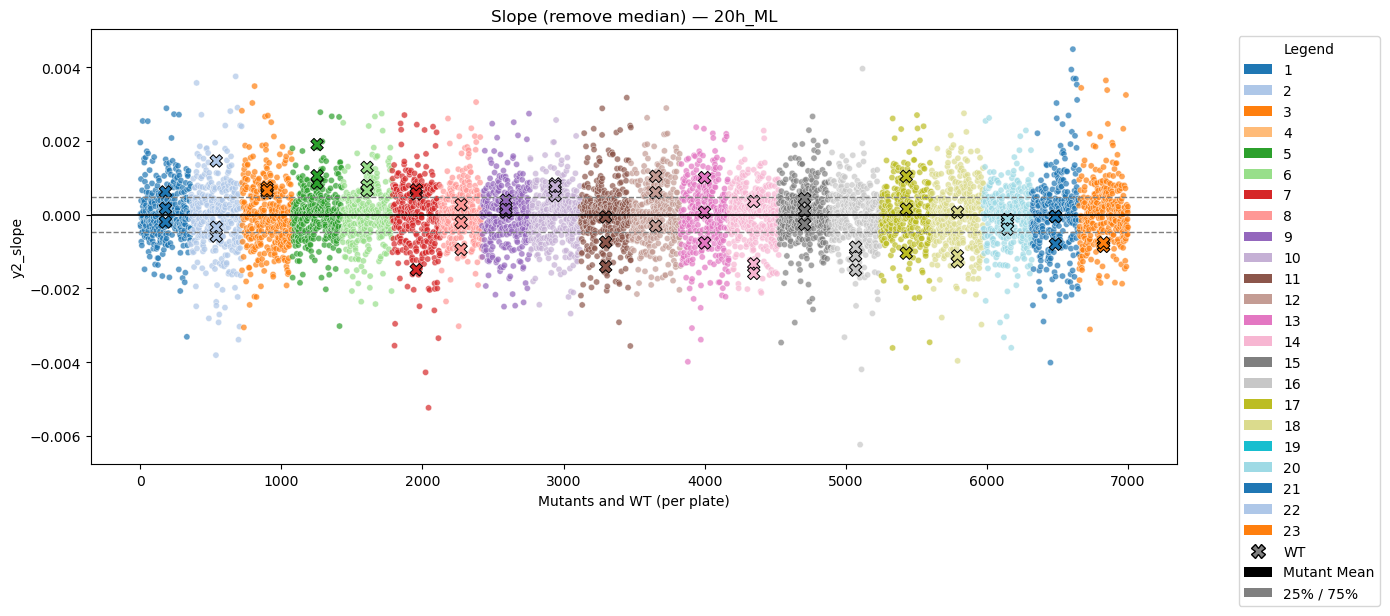

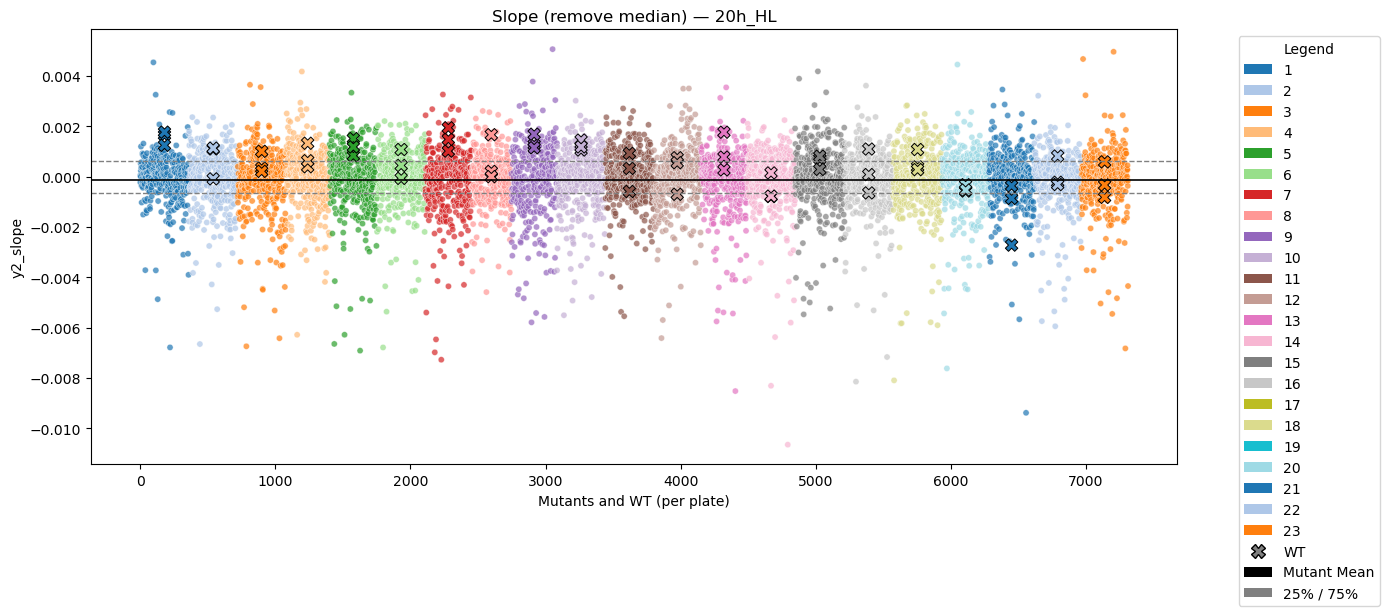

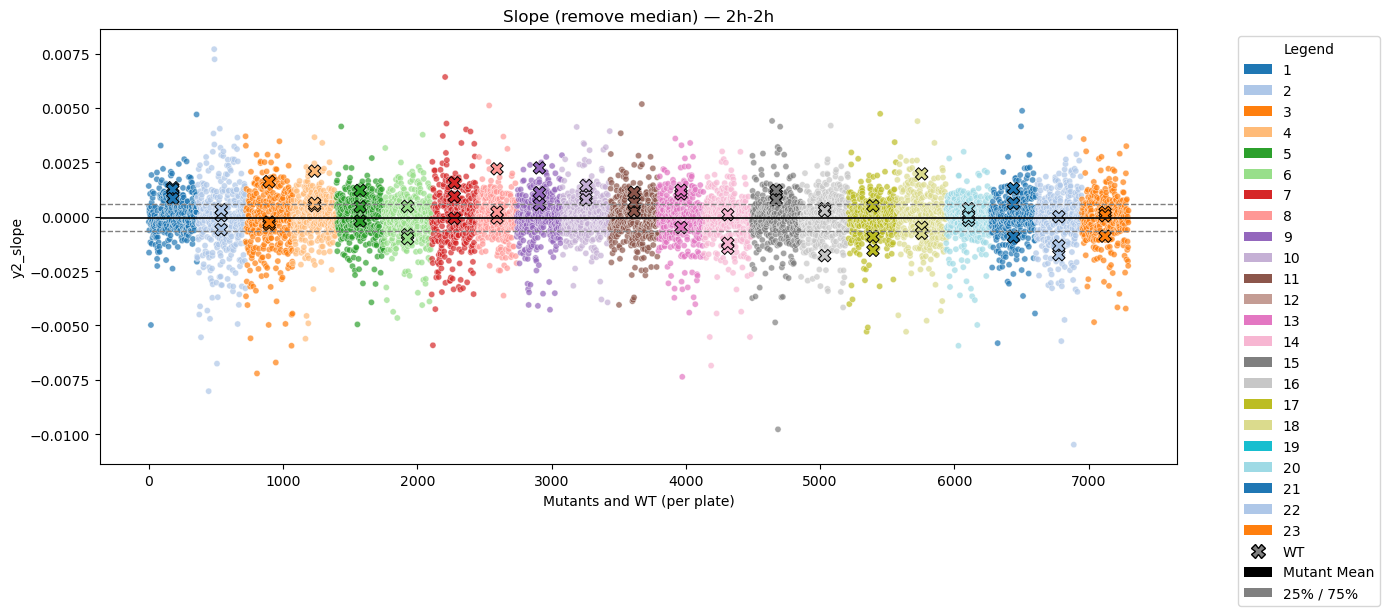

In [19]:
all_plates = list(range(1, 24))  # Plates 1 to 23
global_palette = sns.color_palette('tab20', len(all_plates))
plate_to_color = dict(zip(all_plates, global_palette))

light_regimes = ['20h_ML', '20h_HL','2h-2h']

for regime in light_regimes:
    # Filter mutants (excluding plate 99)
    sub_df = mutant_df[(mutant_df['light_regime'] == regime) & (mutant_df['plate'] != 99)].copy()
    sub_df = sub_df.sort_values(by='plate').reset_index(drop=True)
    sub_df['index'] = sub_df.index

    # Compute summary stats
    mean_val = sub_df['y2_slope_demedian'].mean()
    q1 = sub_df['y2_slope_demedian'].quantile(0.25)
    q3 = sub_df['y2_slope_demedian'].quantile(0.75)

    # Prepare WT data (same regime and plates)
    sub_wt_df = wt_df[
        (wt_df['light_regime'] == regime) &
        (wt_df['plate'].isin(sub_df['plate'].unique()))
    ].copy()
    plate_to_index = sub_df.groupby('plate')['index'].median().to_dict()
    sub_wt_df['index'] = sub_wt_df['plate'].map(plate_to_index)

    # Plot
    plt.figure(figsize=(14, 6))

    # Plot mutants
    sns.scatterplot(
        data=sub_df,
        x='index',
        y='y2_slope_demedian',
        hue='plate',
        palette=plate_to_color,
        alpha=0.7,
        s=20,
        legend=False
    )

    # Plot wild types
    sns.scatterplot(
        data=sub_wt_df,
        x='index',
        y='y2_slope_demedian',
        hue='plate',
        palette=plate_to_color,
        marker='X',
        s=80,
        edgecolor='black',
        legend=False
    )
    # Horizontal lines
    plt.axhline(mean_val, color='black', linestyle='-', linewidth=1.2, label='Mutant Mean')
    plt.axhline(q1, color='gray', linestyle='--', linewidth=1, label='25% Quantile')
    plt.axhline(q3, color='gray', linestyle='--', linewidth=1, label='75% Quantile')

    # Build consistent legend
    legend_elements = [
        Patch(facecolor=plate_to_color[plate], label=f'{plate}')
        for plate in all_plates
    ]
    legend_elements += [
        Line2D([0], [0], marker='X', color='w', markerfacecolor='gray',
               markeredgecolor='black', markersize=10, label='WT'),
        Patch(facecolor='black', label='Mutant Mean'),
        Patch(facecolor='gray', label='25% / 75%', linestyle='--')
    ]

    plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left', title="Legend")
    plt.xlabel("Mutants and WT (per plate)")
    plt.ylabel("y2_slope")
    plt.title(f"Slope (remove median) — {regime}")
    plt.tight_layout()
    plt.show()

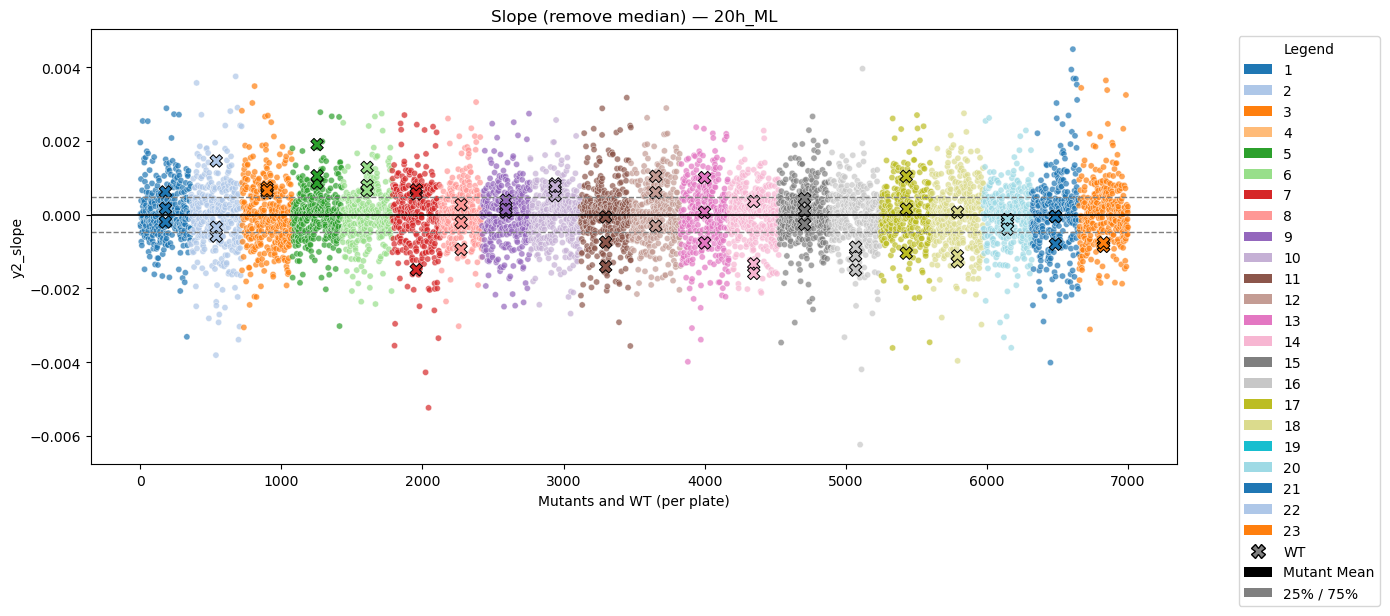

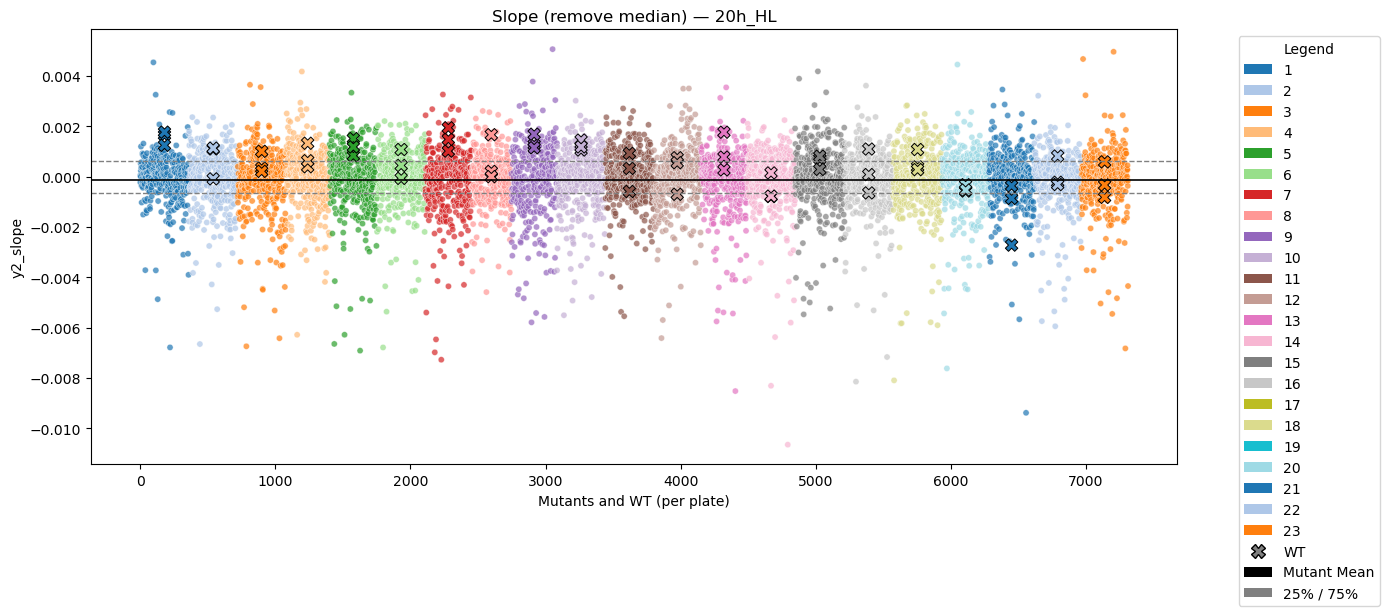

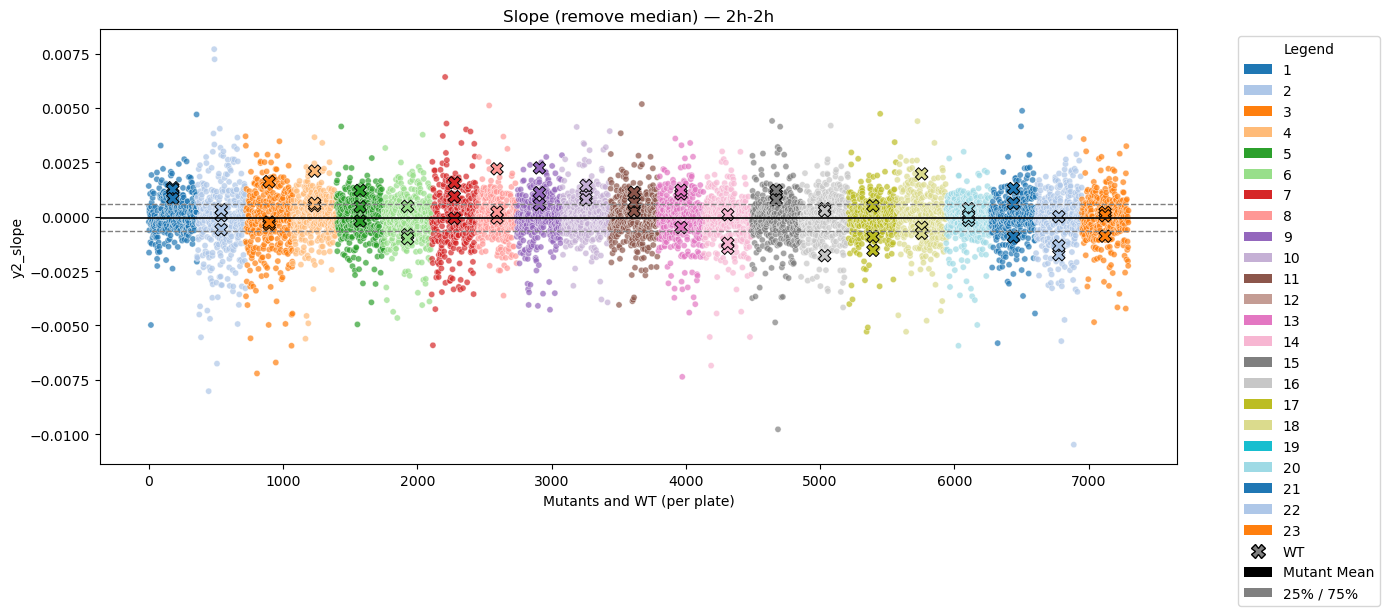

In [20]:
all_plates = list(range(1, 24))  # Plates 1 to 23
global_palette = sns.color_palette('tab20', len(all_plates))
plate_to_color = dict(zip(all_plates, global_palette))

light_regimes = ['20h_ML', '20h_HL','2h-2h']

for regime in light_regimes:
    # Filter mutants (excluding plate 99)
    sub_df = mutant_df[(mutant_df['light_regime'] == regime) & (mutant_df['plate'] != 99)].copy()
    sub_df = sub_df.sort_values(by='plate').reset_index(drop=True)
    sub_df['index'] = sub_df.index

    # Compute summary stats
    mean_val = sub_df['y2_slope_demedian'].mean()
    q1 = sub_df['y2_slope_demedian'].quantile(0.25)
    q3 = sub_df['y2_slope_demedian'].quantile(0.75)

    # Prepare WT data (same regime and plates)
    sub_wt_df = wt_df[
        (wt_df['light_regime'] == regime) &
        (wt_df['plate'].isin(sub_df['plate'].unique()))
    ].copy()
    plate_to_index = sub_df.groupby('plate')['index'].median().to_dict()
    sub_wt_df['index'] = sub_wt_df['plate'].map(plate_to_index)

    # Plot
    plt.figure(figsize=(14, 6))

    # Plot mutants
    sns.scatterplot(
        data=sub_df,
        x='index',
        y='y2_slope_demedian',
        hue='plate',
        palette=plate_to_color,
        alpha=0.7,
        s=20,
        legend=False
    )

    # Plot wild types
    sns.scatterplot(
        data=sub_wt_df,
        x='index',
        y='y2_slope_demedian',
        hue='plate',
        palette=plate_to_color,
        marker='X',
        s=80,
        edgecolor='black',
        legend=False
    )

    # Horizontal lines
    plt.axhline(mean_val, color='black', linestyle='-', linewidth=1.2, label='Mutant Mean')
    plt.axhline(q1, color='gray', linestyle='--', linewidth=1, label='25% Quantile')
    plt.axhline(q3, color='gray', linestyle='--', linewidth=1, label='75% Quantile')

    # Build consistent legend
    legend_elements = [
        Patch(facecolor=plate_to_color[plate], label=f'{plate}')
        for plate in all_plates
    ]
    legend_elements += [
        Line2D([0], [0], marker='X', color='w', markerfacecolor='gray',
               markeredgecolor='black', markersize=10, label='WT'),
        Patch(facecolor='black', label='Mutant Mean'),
        Patch(facecolor='gray', label='25% / 75%', linestyle='--')
    ]

    plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left', title="Legend")
    plt.xlabel("Mutants and WT (per plate)")
    plt.ylabel("y2_slope")
    plt.title(f"Slope (remove median) — {regime}")
    plt.tight_layout()
    plt.show()